# 실습 1 사이킷런으로 단순선형회귀 분석하기

#### 단순 선형회귀 실습을 위한 예제 데이터를 생성하는 코드입니다.
#### X에는 독립변수가 y에는 종속변수가 저장됩니다.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 예제 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 독립 변수
y = 4 + 3 * X + np.random.randn(100, 1)  # 종속 변수

#### 사이킷런에서는 LinearRegression()을 통해 선형회귀를 지원합니다.

In [2]:
# 선형 회귀 모델 학습
model = LinearRegression() ## model이라는 변수에 함수를 저장합니다.

## 1 모델 학습

#### 놀랍게도 선형회귀 모델을 학습시키는 방식은 매우 간단합니다. LinearReression()에 있는 fit()함수 하나만을 이용하면 학습이 끝납니다.
사용방식은 (모델이름).fit(독립변수,종속변수)입니다.


#### <span style="color:red"> (1)fit함수를 통해 단순선형 회귀모델을 학습시켜보세요 </span><br>

In [ ]:
#fit함수로 단순선형 회귀모델 학습


LinearRegression()

#### 모델의 학습이 끝났다면 모델이 구한 회귀계수와 절편을 확인해보겠습니다.

In [4]:
# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)  # 기울기 (slope)
print("절편:", model.intercept_)  # 절편 (intercept)

회귀 계수: [[2.96846751]]
절편: [4.22215108]


## 2 예측

#### 모델을 구현했다면 모델을 통해 예측을 해봅니다. 예측은 predict()함수를 이용하면 매우 간단하게 구해집니다.
사용방식은 (모델이름).predict(새로운 독립변수 데이터)
#### X_new 변수에는 새로운 독립변수에 대한 데이터가 배열의 형태로 저장됩니다.
####  <span style="color:red"> (2)predict()함수를 통해 새로운 데이터에 대한 예측값을 출력해보세요 </span><br>

In [ ]:
# 새로운 데이터에 대한 예측
X_new = np.array([[0], [2]])
y_pred = #(작성해주세요)
print("새로운 데이터에 대한 예측:", y_pred)

새로운 데이터에 대한 예측: [[ 4.22215108]
 [10.1590861 ]]


#### 다음은 우리가 만든 회귀선을 시각화하는 코드입니다.(참고)

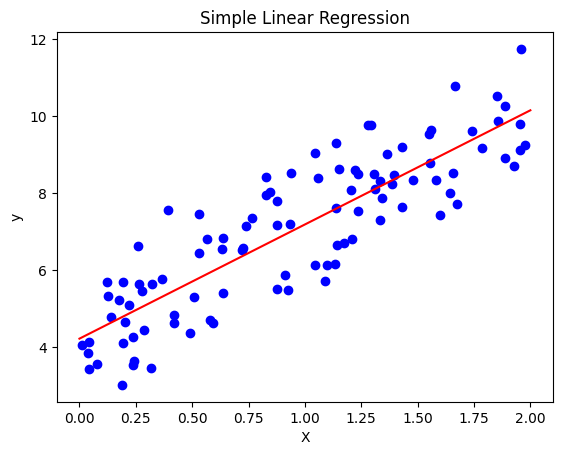

In [6]:
# 학습 데이터와 회귀선 시각화
plt.scatter(X, y, color='blue')
plt.plot(X_new, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

<br><br>

#### 🐤 실습1 여기까지 입니다! 

#### 세션 진행 후에 또 실습 2로 넘어가봅시다! 
<br><br>

# 실습 2 다중선형회귀 모델 만들기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [7]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv("house_price.csv") #보스턴 데이터 불러오기

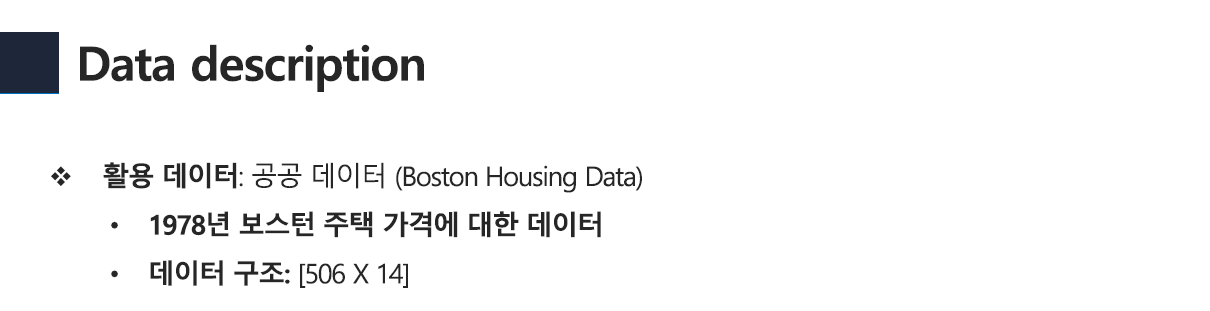

데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

독립 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

종속 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

In [8]:
#데이터 확인
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT.MEDV  
0       15.3  396.90   4.98  24.0         0  
1       17.8  396.90   9.14  21.6         0  
2       17.8  392.83   4.03  34.7         1  
3       18.7  394.63   2.94  33.4         1  
4       18.7  396.90   5.33  36.2         1  
..       ...     ...    ...   ...       ...  
501     21.0  391.99   9.67  22.4         0  
502     21.0  396.90   9.08  20.6         0  
503     21.0  396.90   5.64  23.9         0  
504     21.0  393.45   6.48  22.0         0  
505     21.0  396.90   7.88  11.9         0  

[506 rows x 15 columns]

#### CAT.MEDV는 MEDV(주택 가격)에서 파생된 칼럼이기 때문에 독립변수로 사용하지 않기로 합니다. drop으로 없애버립니다~

In [9]:
boston.drop(labels="CAT.MEDV",axis=1,inplace=True)

#### 추가로 CHAS, RM 은 범주형 변수이므로 이번 실습에서는 고려하지 않도록 합니다.

In [10]:
boston.drop(labels=["CHAS", "RM"],axis=1,inplace=True)

#### 종속변수와 독립변수를 나누어 줍니다.
#### X 독립변수, y 종속변수

In [11]:
# 데이터 프레임 형태로 변환
X = boston.drop(labels='MEDV',axis=1)
y = boston["MEDV"]

#### Train set / Test set 나누기
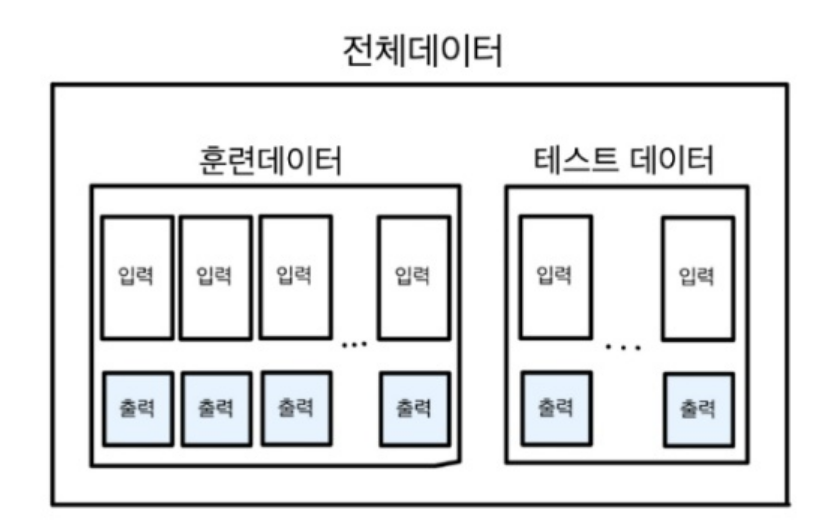
#### 오늘 이론 부분 가장 처음에 있던 내용입니다. 모델을 학습시키기위한 데이터와 모델 성능을 검증헤보는 테스트 데이터로 나누는 과정을 진행합니다. 사이킷런의 train_test_split을 이용하여 데이터를 나눌 수 있습니다.
#### 아래 코드에서 test_size는 0.2로 테스트 데이터를 전체의 20퍼센트로 잡는다는 의미입니다.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

## StatModels VS Sklearn

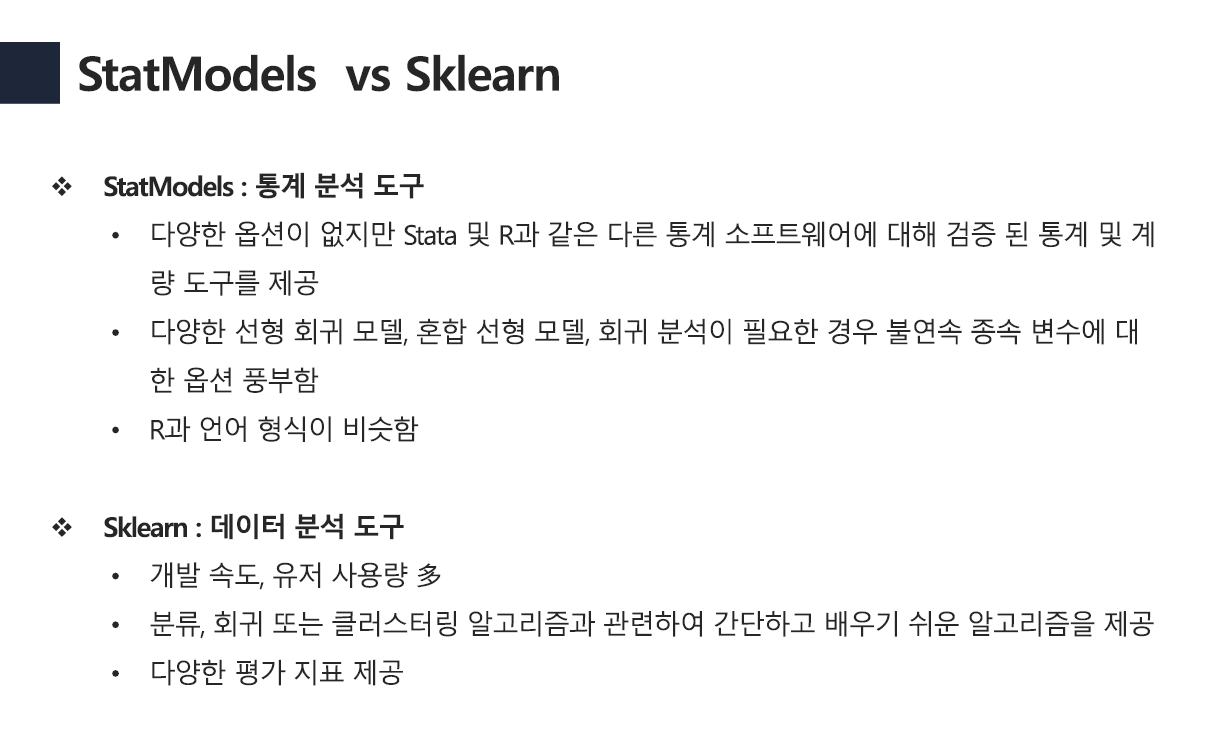

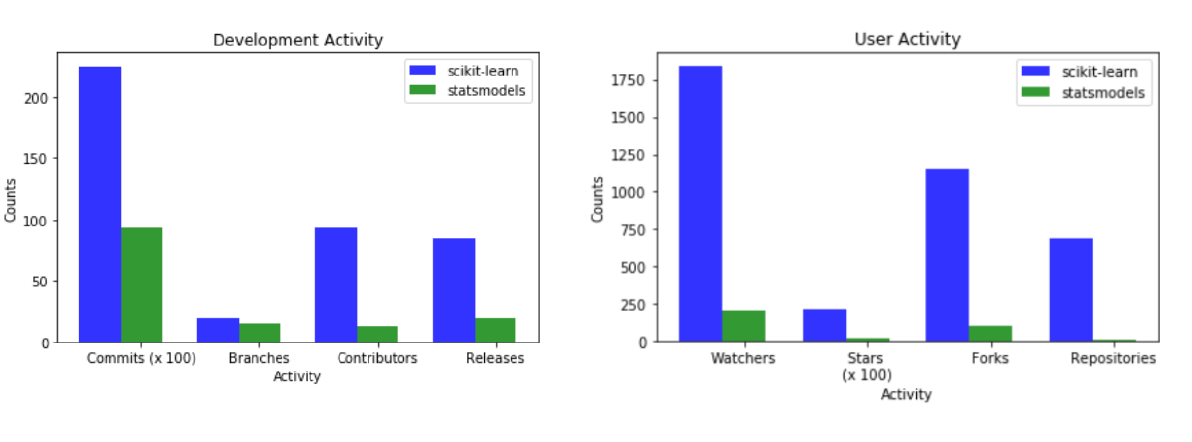

## 사이킷런으로 다중회귀

#### <span style="color:red"> (3)train 데이터를 이용해 사이킷런 방식으로 회귀모델을 만들고 예측까지 해보세요 </span><br>

In [ ]:
from sklearn.linear_model import LinearRegression
#lr_skl 변수에 LinearRegression()을 저장하세요.

#방금 나눈 데이터중 train데이터를 fit시켜주세요.

#이번에는 test데이터를 이용해 predict을 하고 그 결과를 y_pred_skl변수에 저장하세요

#결과 확인
y_pred_skl 

array([20.10167123, 15.78323064, 24.19804011, 13.52409229, 36.77477966,
       20.21314403, 27.8426581 , 32.4662449 , 20.23349914, 32.04621612,
       28.91392077, 26.41855909, 17.72185152, 37.75019032, 31.79211506,
       24.3623091 , 22.9948222 ,  7.12753635,  6.12102969, 34.26564987,
       22.87210472, 12.45724513, 13.56561997, 29.8342751 , 17.73256376,
       16.50031858, 23.2038726 , 24.89099343, 22.69426441, 14.56878156,
       20.10616892, 33.58900677, 12.31866992, 24.19586009, 28.15989018,
       15.44335581, 28.97800277, 16.2856917 , 32.07754608, 24.81123272,
       21.52373077, 28.69407673, 29.68382114, 29.23800986,  6.32214331,
       33.38345942, 21.93881894, 22.23399216, 24.58847804, 31.33780126,
       15.43765102, 36.70969182, 21.02505548, 30.96915922, 19.08176957,
       25.48627415, 23.35270973, 22.73405016, 30.55899095, 24.77118978,
       31.03341886, 20.80884899, 11.28692835, 28.26330676, 25.84842529,
       22.34780477, 23.51986165, 27.65068161, 23.15885841,  1.43

#### 만든 모델을 평가하는 지표 MSE,MAE,R2값
#### 다음과 같이 사이킷런의 모듈을 이용하면 쉽게 구할 수 있습니다.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

test_mse_skl = mean_squared_error(y_test, y_pred_skl) #실측값,예측값 순서로 넣어줍니다.
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

Testing MSE: 26.890
Testing MAE: 3.862
Testing R2: 0.579


## statsmodels의 OLS 모듈로 선형회귀 모델 구축하기

[statsmodels의 OLS를 사용하여 선형회귀분석 시행 (OLS: Ordinary Least Squares)]
 - OLS: 최소 제곱법
 - 모델 선언: model = sm.OLS(Y데이터(종속,타켓), X데이터(독립,설명))   
 - 모델 학습: model_trained = model.fit()
 
 #### ols모듈은 절편(상수항)이 없는 것이 기본값이므로 add_contant를 통해 모델이 상수항을 고려하도록 합니다.

In [15]:
X_train = sm.add_constant(X_train)

#### <span style="color:red"> (4)ols모듈을 이용해 선형회귀 모델을 만들어보세요 </span><br>

In [ ]:
#model변수에 sm.OLS를 저장해보세요

#모델을 학습시켜 model_trained변수에 저장하세요


#### 선형회귀 모델 가정(정규성, 등분산성 등등)을 확인하는 과정이 사실 가장 먼저 확인되어야 하지만 오늘 실습에서는 넘어가겠습니다.

## 다중공선성 확인
#### 위 모델은 모든 변수를 독립변수로 사용했습니다. 13개변수는 사실 너무나 많은 변수입니다.. 다중공선성을 확인하는 과정이 필수입니다. 확인해볼까요?

####  <span style="color:red"> (5)히트맵을 이용하여 상관계수를 통한 독립변수들(X에 저장했음)의 다중공선성을 확인해 보세요 </span><br>

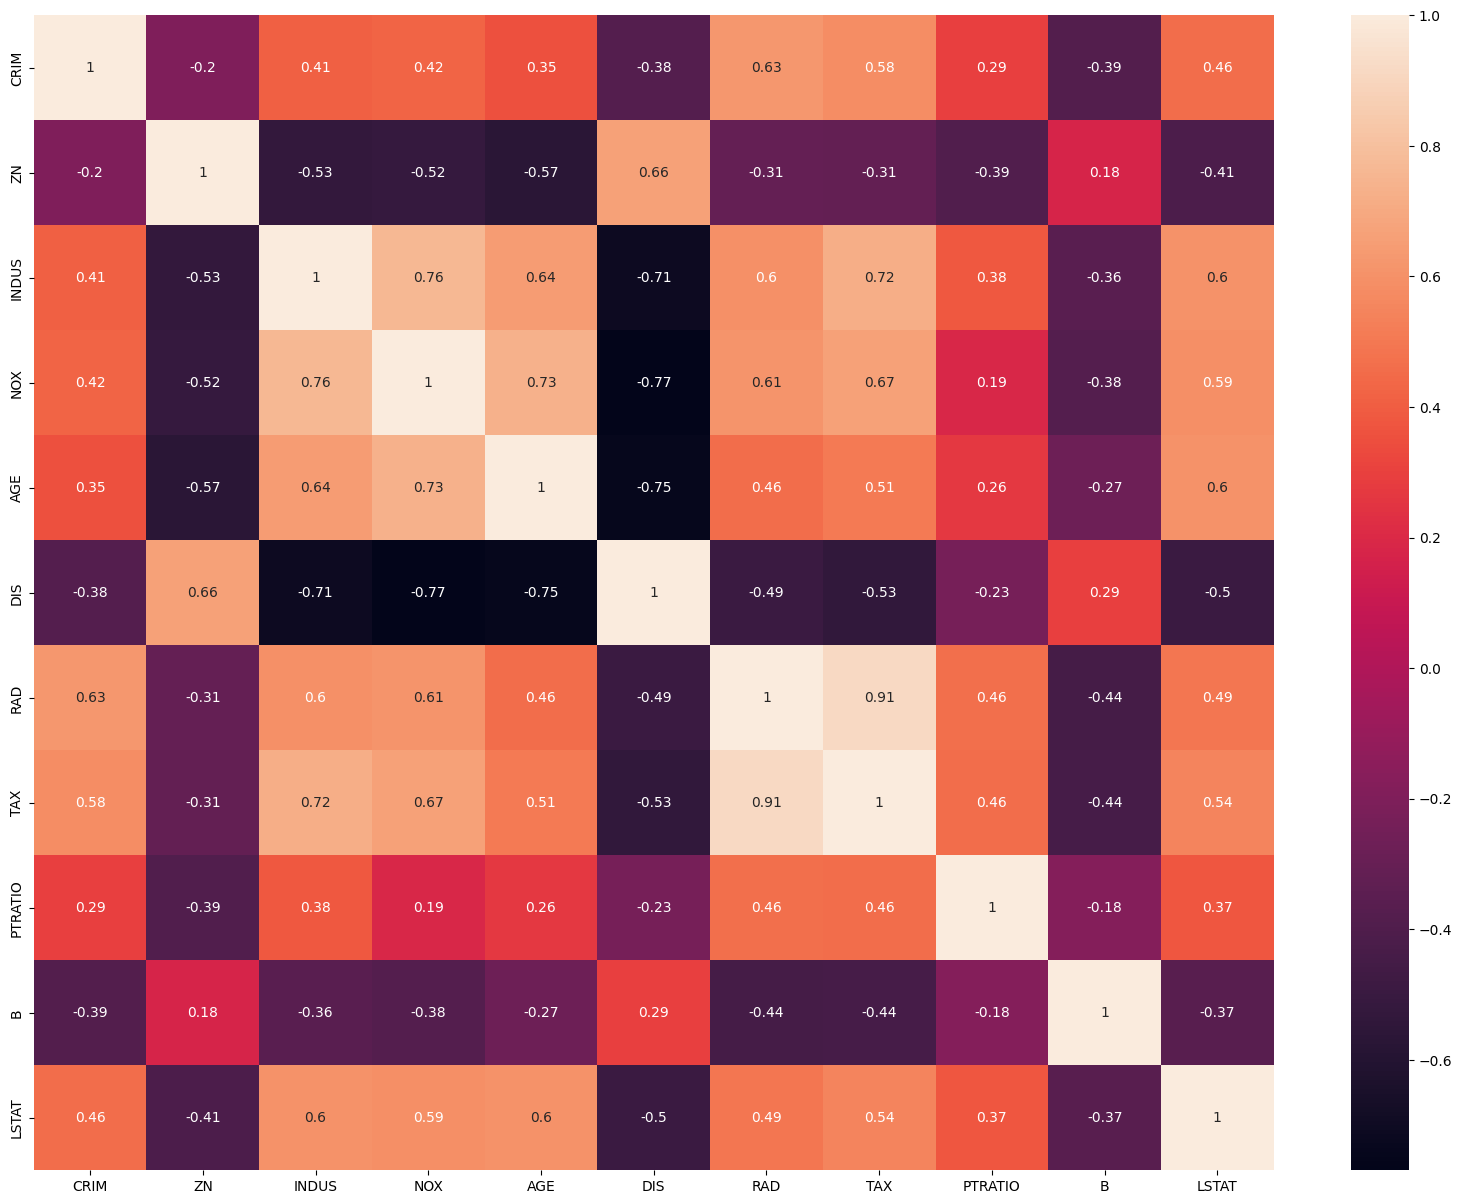

In [ ]:
import seaborn as sns   #heatmap 만들기 위한 라이브러리
plt.figure(figsize=(20,15))

#히트맵 찍기


In [18]:
#상관계수 확인
X.corr()

CRIM        ZN     INDUS       NOX       AGE       DIS       RAD  \
CRIM     1.000000 -0.200469  0.406583  0.420972  0.352734 -0.379670  0.625505   
ZN      -0.200469  1.000000 -0.533828 -0.516604 -0.569537  0.664408 -0.311948   
INDUS    0.406583 -0.533828  1.000000  0.763651  0.644779 -0.708027  0.595129   
NOX      0.420972 -0.516604  0.763651  1.000000  0.731470 -0.769230  0.611441   
AGE      0.352734 -0.569537  0.644779  0.731470  1.000000 -0.747881  0.456022   
DIS     -0.379670  0.664408 -0.708027 -0.769230 -0.747881  1.000000 -0.494588   
RAD      0.625505 -0.311948  0.595129  0.611441  0.456022 -0.494588  1.000000   
TAX      0.582764 -0.314563  0.720760  0.668023  0.506456 -0.534432  0.910228   
PTRATIO  0.289946 -0.391679  0.383248  0.188933  0.261515 -0.232471  0.464741   
B       -0.385064  0.175520 -0.356977 -0.380051 -0.273534  0.291512 -0.444413   
LSTAT    0.455621 -0.412995  0.603800  0.590879  0.602339 -0.496996  0.488676   

              TAX   PTRATIO         B     LSTAT  
CRIM     0.582764  0.289946 -0.385064  0.455621  
ZN      -0.314563 -0.391679  0.175520 -0.412995  
INDUS    0.720760  0.383248 -0.356977  0.603800  
NOX      0.668023  0.188933 -0.380051  0.590879  
AGE      0.506456  0.261515 -0.273534  0.602339  
DIS     -0.534432 -0.232471  0.291512 -0.496996  
RAD      0.910228  0.464741 -0.444413  0.488676  
TAX      1.000000  0.460853 -0.441808  0.543993  
PTRATIO  0.460853  1.000000 -0.177383  0.374044  
B       -0.441808 -0.177383  1.000000 -0.366087  
LSTAT    0.543993  0.374044 -0.366087  1.000000

#### 이번에는 VIF를 이용해 다중공선성을 확인해보겠습니다.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재
def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.094232
1        ZN   2.670622
2     INDUS  13.864887
3       NOX  54.940564
4       AGE  20.363576
5       DIS  14.219901
6       RAD  14.952704
7       TAX  60.359630
8   PTRATIO  65.765526
9         B  19.536731
10    LSTAT   8.460656


#### 10이 넘는게 너무 많다....
#### 팁: vif가 높은 변수가 하나씩 줄어들면 다른 변수들의 vif에도 영향을 미친다. 그래서 변수들을 한 번에 다 제거하기보다는 하나씩 제거하면서 확인해 나아가는 것이 바람직하다. 

#### 일단 가장 높은 PTRATIO를 없애보자

In [20]:
vif(X.drop('PTRATIO',axis=1))

  Features        VIF
0     CRIM   2.090303
1       ZN   2.425702
2    INDUS  13.851577
3      NOX  50.075041
4      AGE  19.901374
5      DIS   9.556408
6      RAD  14.949309
7      TAX  57.588871
8        B  16.547761
9    LSTAT   8.382289


#### 그래도 10을 넘는게 너무 많다.... 다음으로 vif가 높은 NOX도 제거해보자

In [21]:
vif(X.drop(['PTRATIO','NOX'],axis=1))

  Features        VIF
0     CRIM   2.090061
1       ZN   2.423652
2    INDUS  12.980150
3      AGE  14.589368
4      DIS   9.228030
5      RAD  14.907426
6      TAX  53.714464
7        B  14.115437
8    LSTAT   8.313113


#### <span style="color:red"> (6)위와 같이 가장 높은 vif를 하나씩 지우는 방식으로 vif가 모두 15이하가 되도록 변수들을 제거해보세요(힌트:총 3개의 변수를 지워야합니다.)</span><br>

In [ ]:
#여기에 코드작성

  Features        VIF
0     CRIM   2.089933
1       ZN   2.331347
2    INDUS   8.985794
3      AGE  13.876848
4      DIS   8.414378
5      RAD   4.771754
6        B  13.475807
7    LSTAT   8.260737


#### 총 3개의 변수를 지워보니 다중공선성이 어느정도 해결된 것 같습니다. inplace를 True로 하지 않았기에 실제로는 변수를 제거하지 않았습니다.

<br><br>

#### 🐹실습2 여기까지 입니다! 

#### 남은 세션 진행후에 마지막 실습3으로 넘어가봅시다 :) 
<br><br>

# 실습 3 모델 평가(통계적 해석)
- MSE, MAE, R-squared (결정계수,coefficient of determination):모형의 성능, F값
- P>[t] (p-value):0.05(유의수준) 이하일 때 변수가 유의미

#### 모델의 통계 장표는 summary() 함수를 이용하여 확인합니다.

In [23]:
boston.drop(labels=["PTRATIO", "NOX", "TAX"],axis=1,inplace=True)

X = boston.drop(labels='MEDV',axis=1)
y = boston["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

from sklearn.linear_model import LinearRegression
lr_skl = LinearRegression() # default가 fit_intercept=True
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)
y_pred_skl 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

test_mse_skl = mean_squared_error(y_test, y_pred_skl) #실측값,예측값 순서로 넣어줍니다.
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

X_train = sm.add_constant(X_train)

model=sm.OLS(y_train,X_train)
model_trained=model.fit()

In [24]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     92.11
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.86e-85
Time:                        12:08:09   Log-Likelihood:                -1268.7
No. Observations:                 404   AIC:                             2555.
Df Residuals:                     395   BIC:                             2591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4283      2.390     16.497      0.0

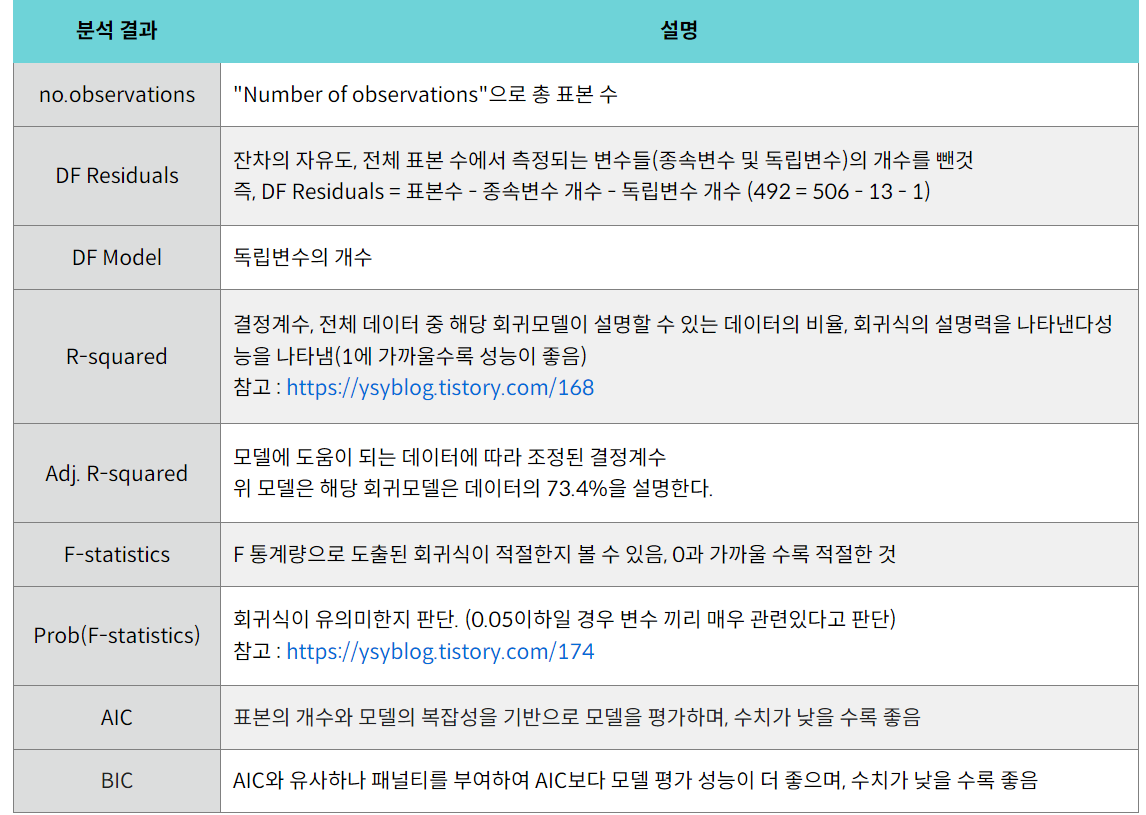
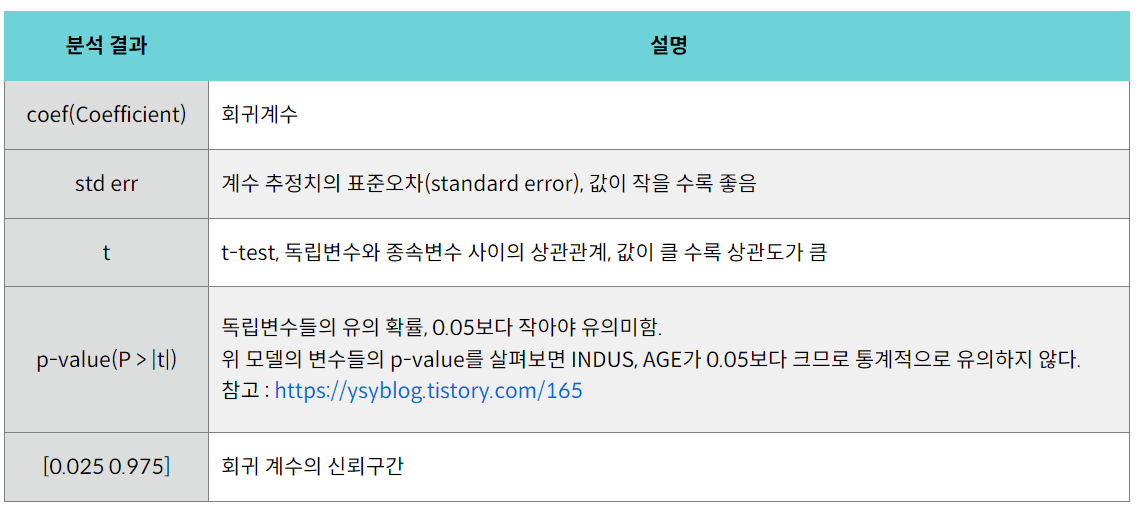
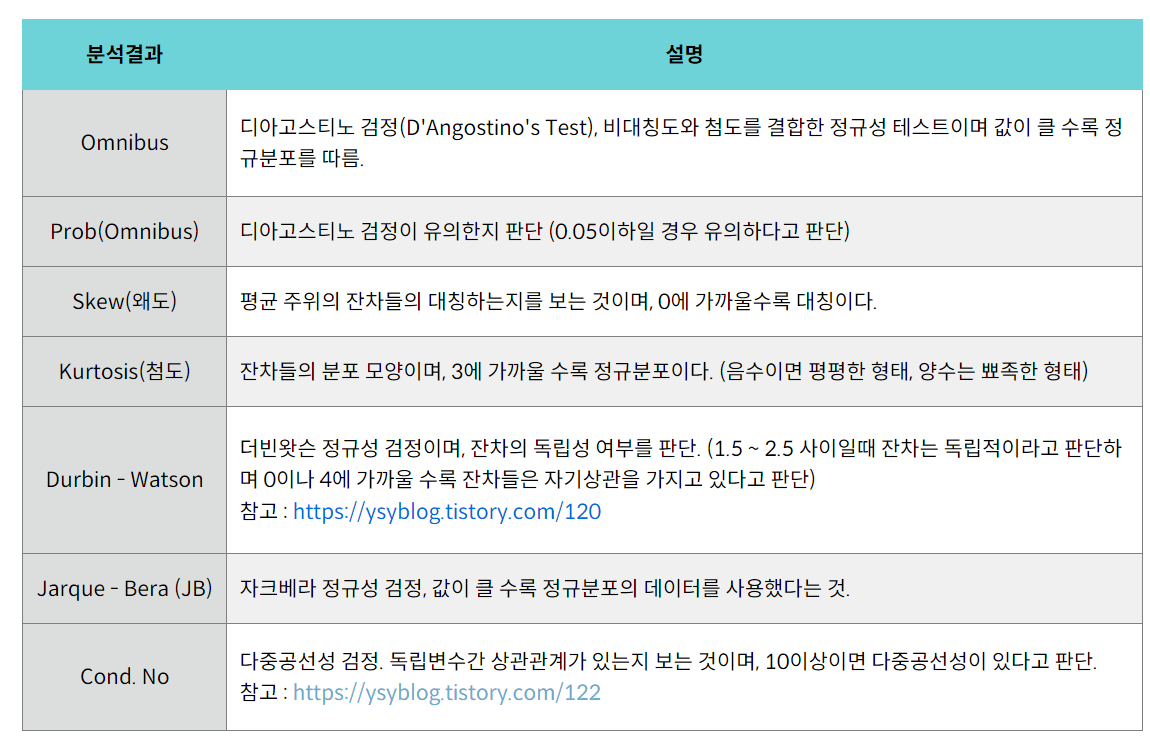

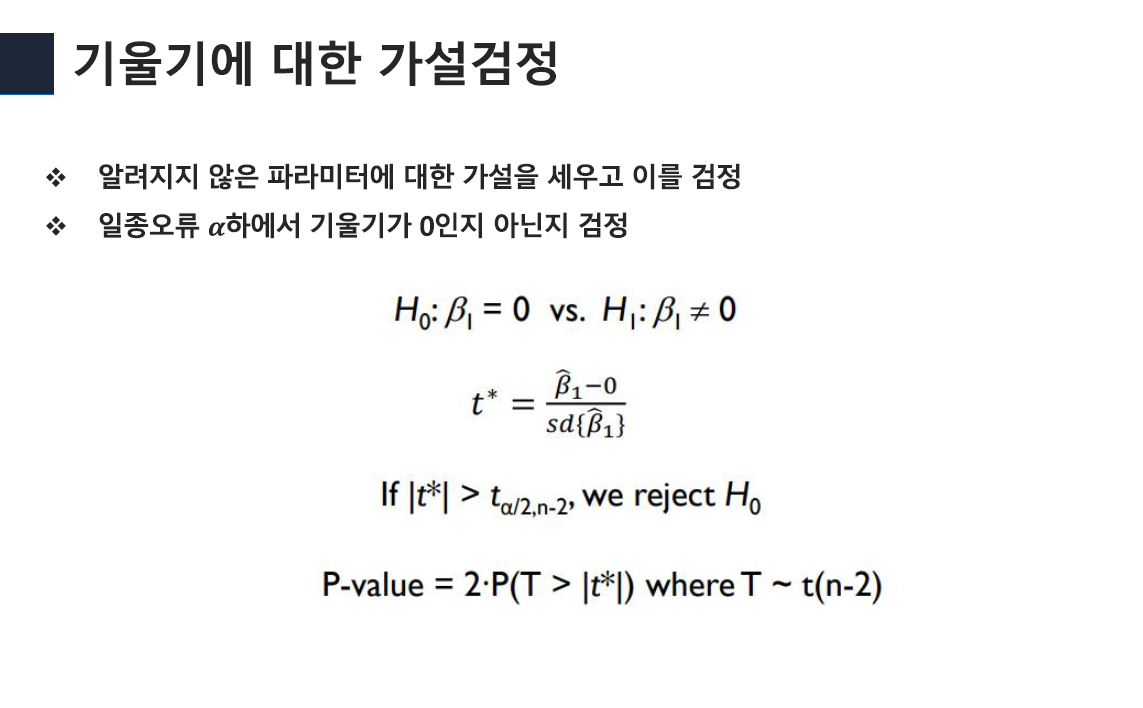

#### 마지막에 배운 t검정을 통해 유의하지 않은 변수를 제거할 예정입니다.
#### 위와 같이 회귀 계수가 0이다를 귀무가설로 설정하고 검정을 진행합니다.
#### <span style="color:red"> (7)t에 대한 pvalue가 가장 높은 두개의 칼럼을 제거한 선형회귀 모델을 만들고 장표를 만들어 보세요 </span><br>

In [ ]:
#model=sm.OLS(종속,독립) 형태를 활용하세요! X_train.drop(~~)응 활용해 칼럼을 제거해주세요!

#모델을 학습시키고 model_trained 변수에 저장하세요(fit을 이용해야겠죠?)

#장표 찍기 summary()함수 이용..


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.25e-86
Time:                        12:09:10   Log-Likelihood:                -1270.8
No. Observations:                 404   AIC:                             2556.
Df Residuals:                     397   BIC:                             2584.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8825      1.948     21.503      0.0

#### test 데이터로 모델 성능을 평가해보겠습니다. mse, mae, r2 값을 구하는 모듈을 import 해줍니다.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### 마찬가지로 테스트 데이터에도 상수항을 추가해줍니다.

In [27]:
X_test = sm.add_constant(X_test)

#### 모델의 예측값을 저장할 y_test_pred 변수를 다음과 같이 설정합니다.

In [28]:
y_test_pred = model_trained.predict(X_test.drop(['RAD', 'AGE'], axis=1))
y_test_pred

210    17.655399
24     18.038075
36     25.174639
439    14.085812
161    33.291683
         ...    
8       3.439348
317    18.743183
390    19.336121
482    25.572959
50     18.519612
Length: 102, dtype: float64

#### 4.3.1 Mean Squared Error (평균 제곱 오차) <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [29]:
print(mean_squared_error(y_test, y_test_pred))

32.55004787724734


#### 4.3.3 Mean Absolute Error (평균 절대 오차)<br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

In [30]:
print(mean_absolute_error(y_test, y_test_pred))

4.284526005546312


#### 4.3.5 R squared (결정계수) <br>

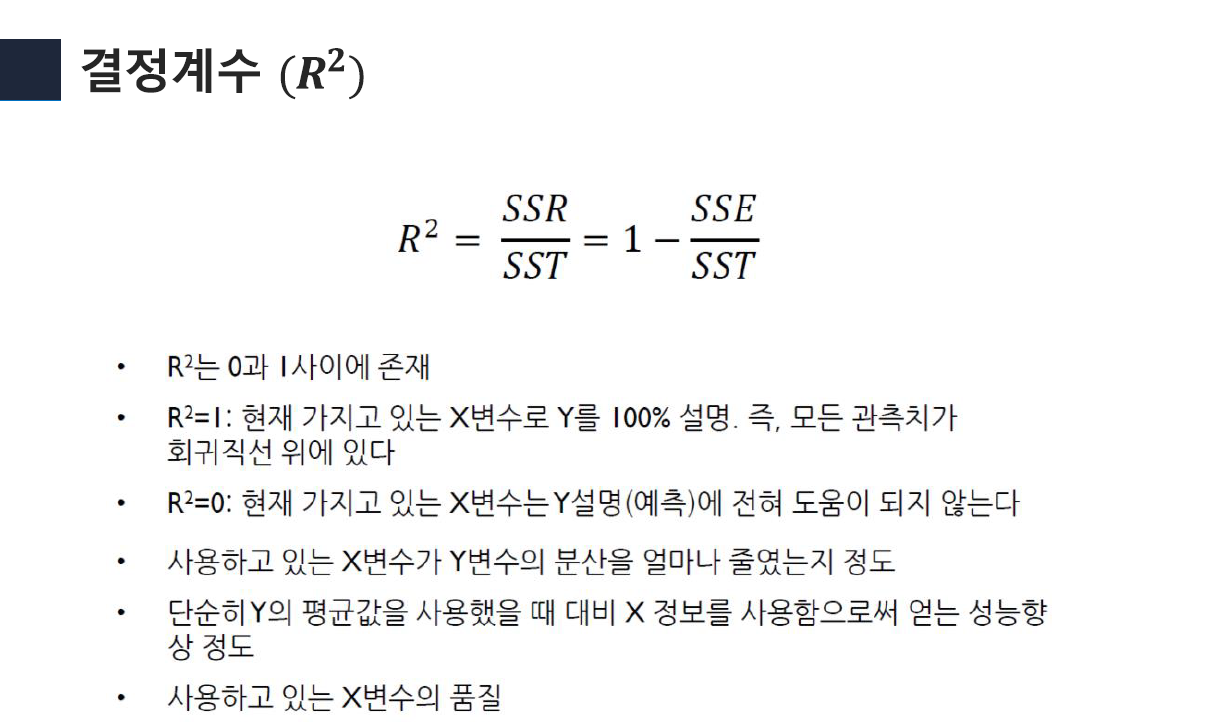

In [31]:
print(r2_score(y_test, y_test_pred))

0.490420622465792


#### 이 회귀모델은 test데이터에 대해 63퍼센트 정도의 설명력을 보여줍니다.

In [32]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 32.550
Testing MAE: 4.285
Testing R2: 0.490


#### <span style="color:red"> (8)다중공선성과 t값을 고려하여 본인만의 모델을 자유롭게 구현하고 테스트 데이터에 따른 평가(mse, mae, r2)를 해보세요 </span><br>

In [33]:
# 상기 실습 내용을 복습하며 본인만의 모델을 자유롭게 구현해보세요 ~ 